# Road Traffic Accident Severity Prediction System

STEP 1: Import required librares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

STEP 2: Loading the Data

Description:
This dataset contains comprehensive information on road traffic accidents in the United Kingdom. It includes data on the location, date, severity, and type of accidents, as well as details about the vehicles and casualties involved. The dataset is valuable for analyzing trends in traffic incidents, identifying high-risk areas, evaluating the impact of road safety measures, and building predictive models to enhance traffic management and public safety initiatives.

In [2]:
print("The Data is Loading.....")
df = pd.read_csv("Road Accident Data.csv")
print(".....The Data loaded successfully")

The Data is Loading.....
.....The Data loaded successfully


In [3]:
df.head(5)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
df.tail(5)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
307968,BS0307969,18-02-2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,None,...,2,1,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car
307969,BS0307970,21-02-2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,None,...,1,1,Northern,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,Car
307970,BS0307971,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,None,...,1,3,Northern,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,Car
307971,BS0307972,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,None,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc
307972,BS0307973,28-02-2022,Sunday,Give way or uncontrolled,T or staggered junction,Serious,57.575210,Daylight,Highland,Other object on road,...,1,1,Northern,Wet or damp,Dual carriageway,60,15:45,Rural,Snowing no high winds,Car


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         307970 non-null  object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [6]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


<AxesSubplot:>

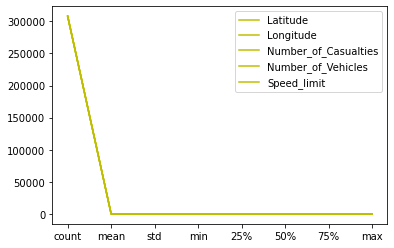

In [7]:
df.describe().plot(kind='line',color='y')

In [8]:
df.dtypes

Accident_Index                 object
Accident Date                  object
Day_of_Week                    object
Junction_Control               object
Junction_Detail                object
Accident_Severity              object
Latitude                      float64
Light_Conditions               object
Local_Authority_(District)     object
Carriageway_Hazards            object
Longitude                     float64
Number_of_Casualties            int64
Number_of_Vehicles              int64
Police_Force                   object
Road_Surface_Conditions        object
Road_Type                      object
Speed_limit                     int64
Time                           object
Urban_or_Rural_Area            object
Weather_Conditions             object
Vehicle_Type                   object
dtype: object

In [9]:
df.shape

(307973, 21)

In [10]:
print("checking missing values")
df.isnull().sum()

checking missing values


Accident_Index                 0
Accident Date                  0
Day_of_Week                    0
Junction_Control               0
Junction_Detail                0
Accident_Severity              0
Latitude                       0
Light_Conditions               0
Local_Authority_(District)     0
Carriageway_Hazards            3
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Police_Force                   0
Road_Surface_Conditions        0
Road_Type                      0
Speed_limit                    0
Time                          17
Urban_or_Rural_Area            0
Weather_Conditions             0
Vehicle_Type                   0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

STEP 3: Data Preprocessing

Clean the dataset: Handle missing values in Time and Carriageway_Hazards and Convert Accident Date and Time to datetime objects


In [13]:
print("Convert Accident Date to datetime. The date format may vary, so we let Pandas infer the format")
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')

print('\nNumber of missing dates after conversion:', df['Accident Date'].isna().sum())

# We can also extract additional temporal features if needed (e.g., month, day, year)
df['Accident_Month'] = df['Accident Date'].dt.month
df['Accident_Year'] = df['Accident Date'].dt.year

# Converting the 'Time' column to a datetime.time object. Sometimes its formatting misbehaves
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

print("\nchecking missing values again across the dataset")
missing_values = df.isnull().sum()

print('Missing values per column:')
print(missing_values[missing_values > 0])



Convert Accident Date to datetime. The date format may vary, so we let Pandas infer the format

Number of missing dates after conversion: 0

checking missing values again across the dataset
Missing values per column:
Carriageway_Hazards     3
Time                   17
dtype: int64


In [14]:

df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour

cat_cols = ['Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Accident_Severity',
            'Light_Conditions', 'Local_Authority_(District)', 'Carriageway_Hazards',
            'Police_Force', 'Road_Surface_Conditions', 'Road_Type', 'Urban_or_Rural_Area',
            'Weather_Conditions', 'Vehicle_Type']

le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le

STEP 4: Applying Explanatory Data Analysis and Data Visualisation

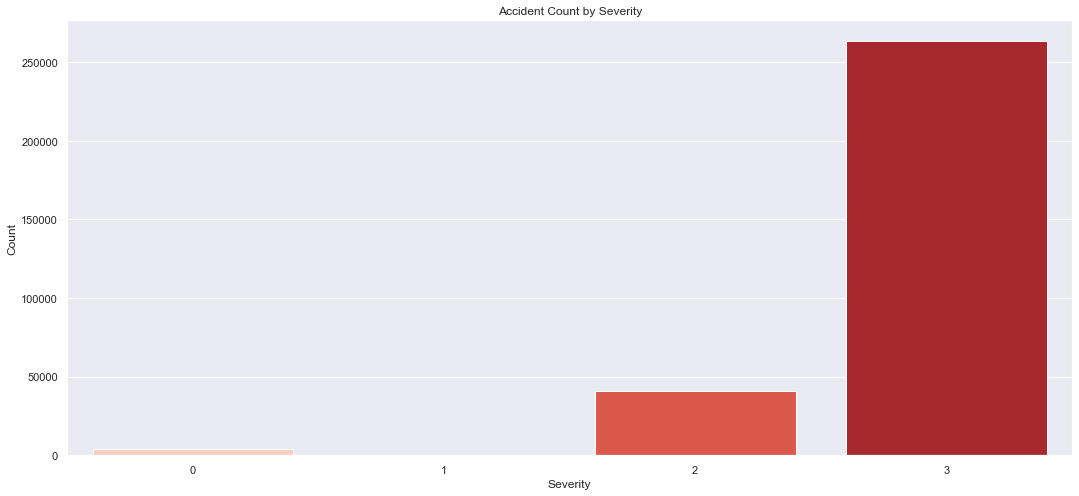

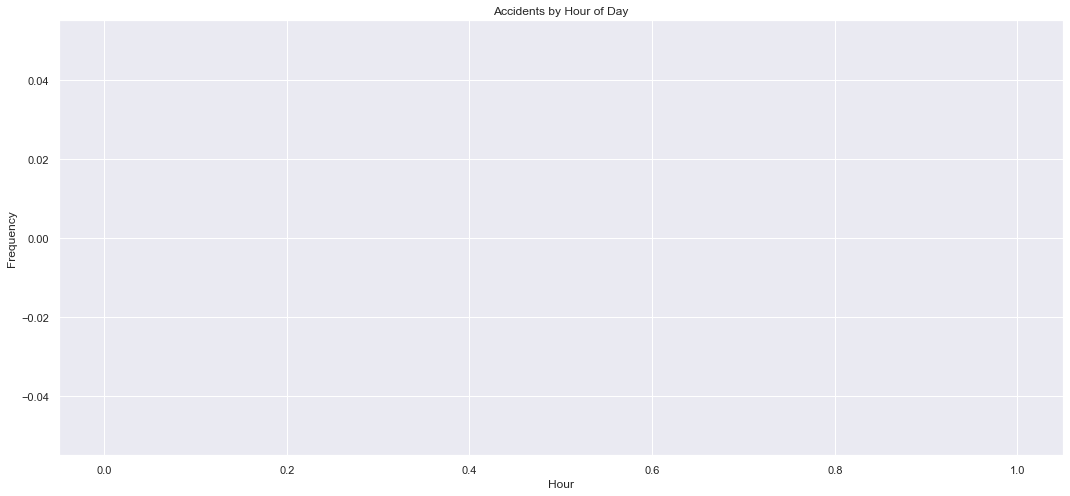

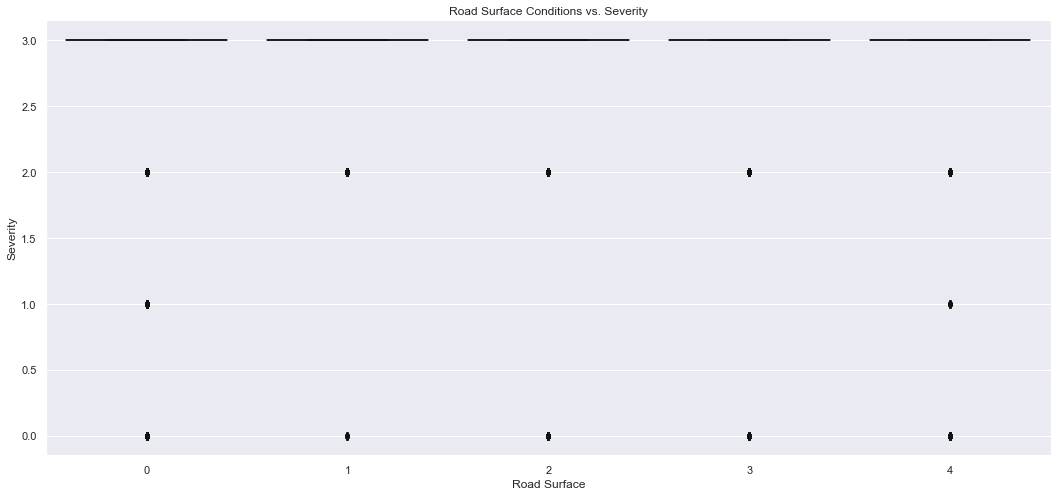

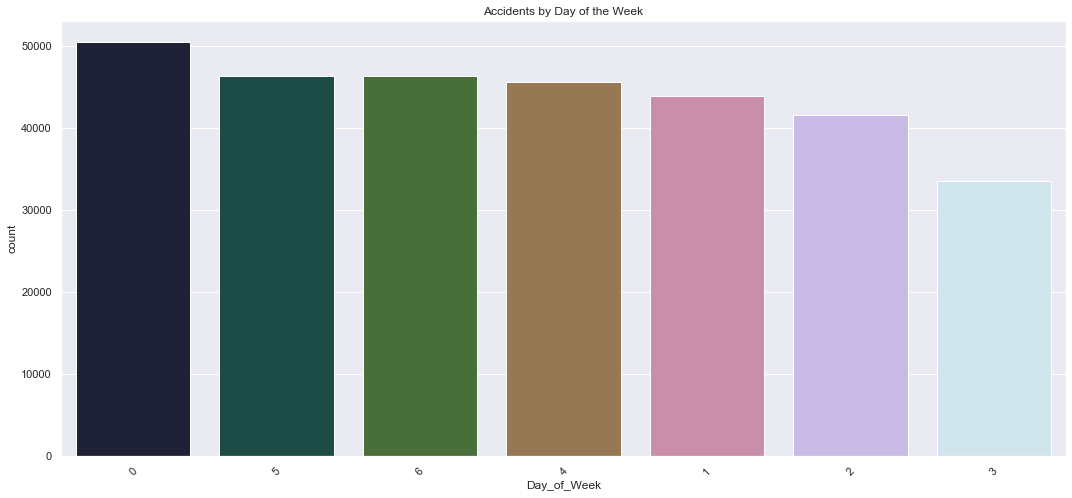

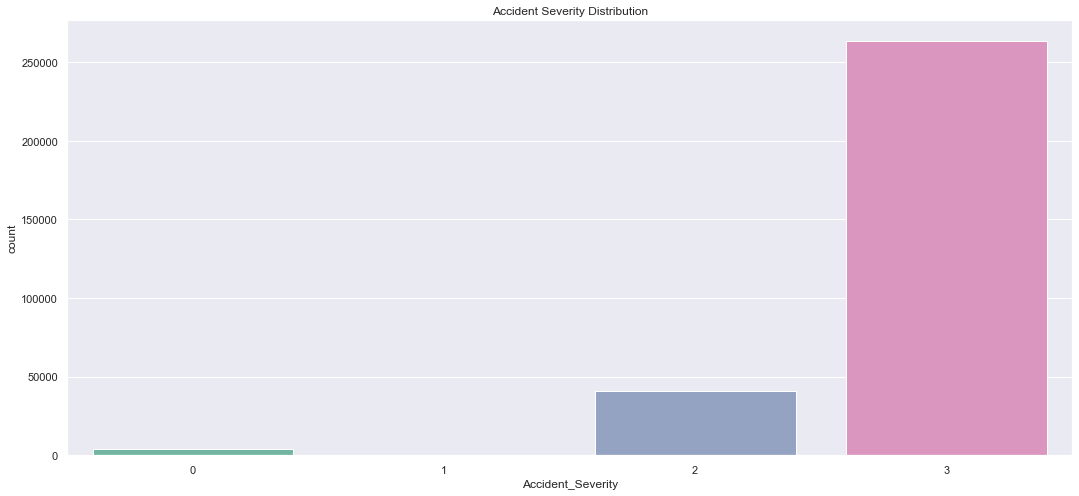

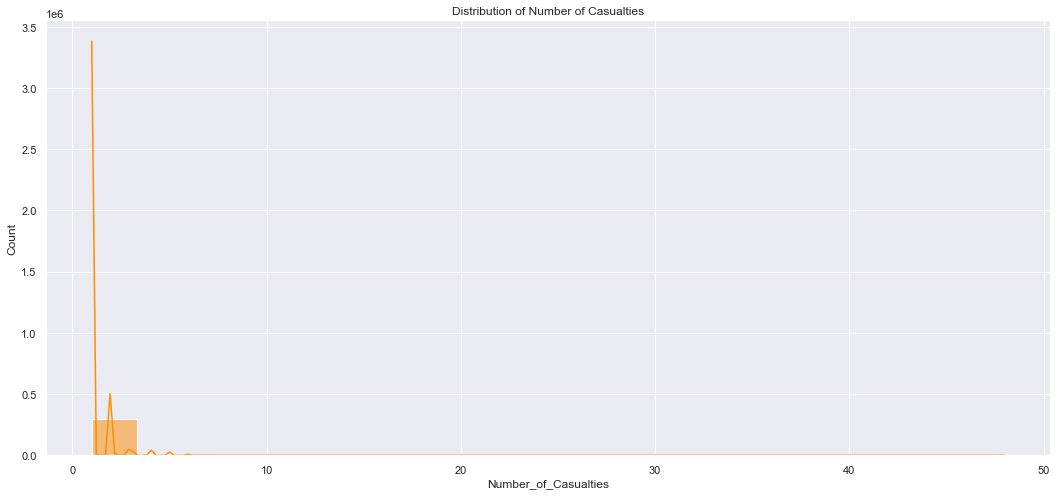

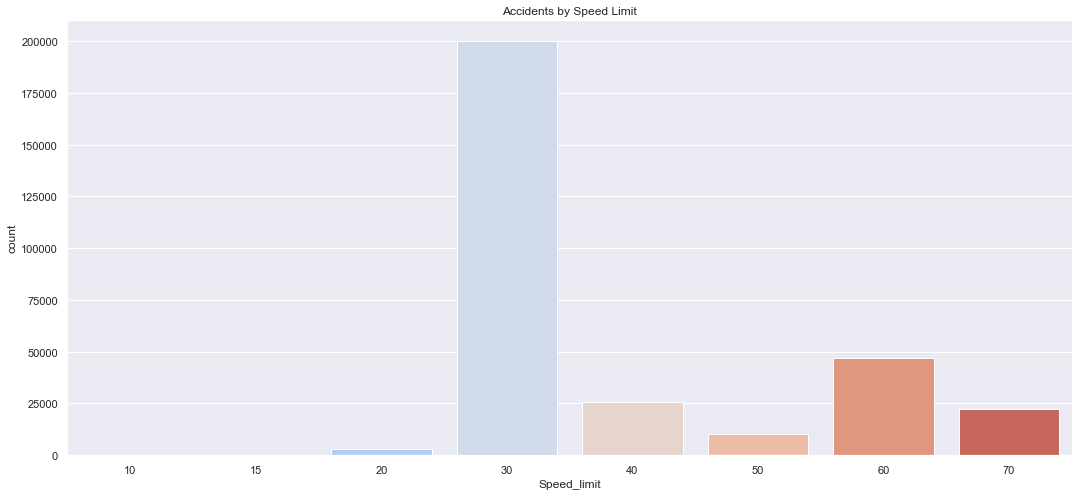

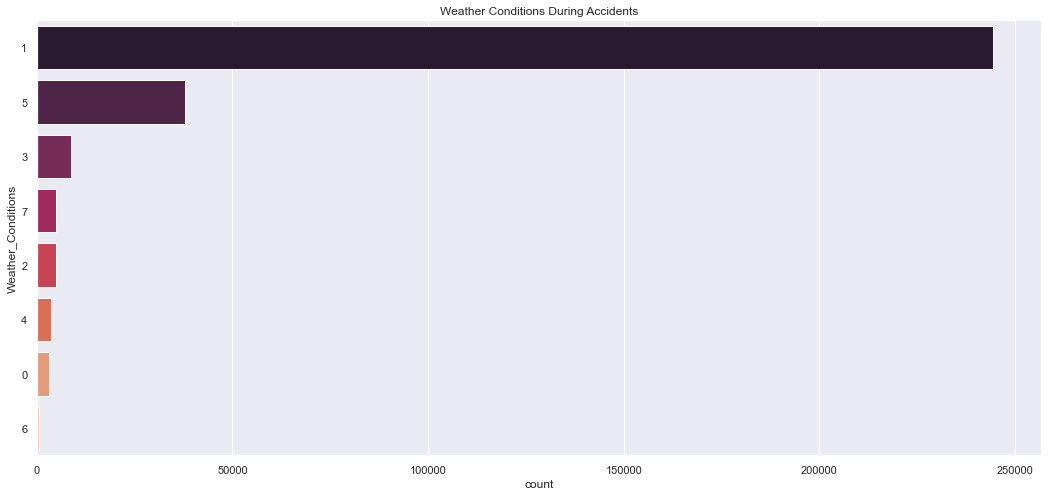

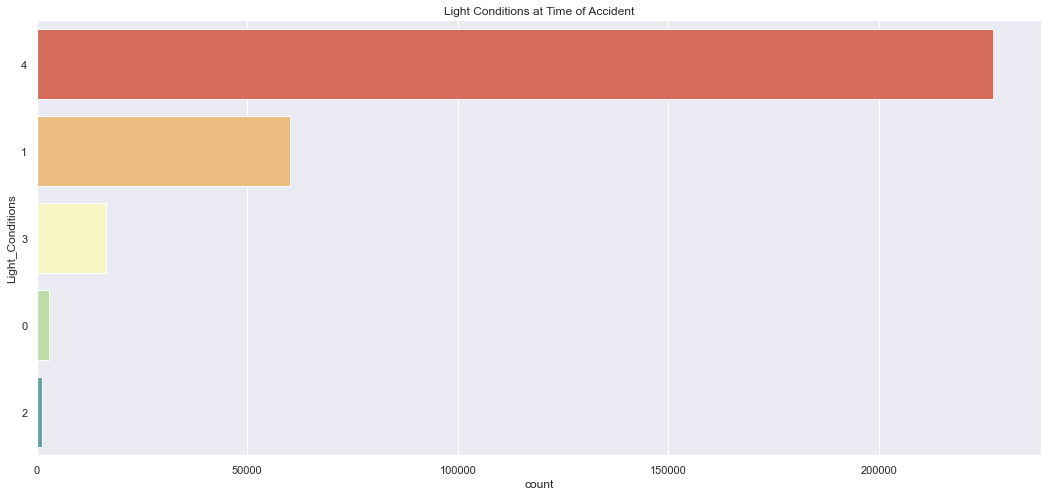

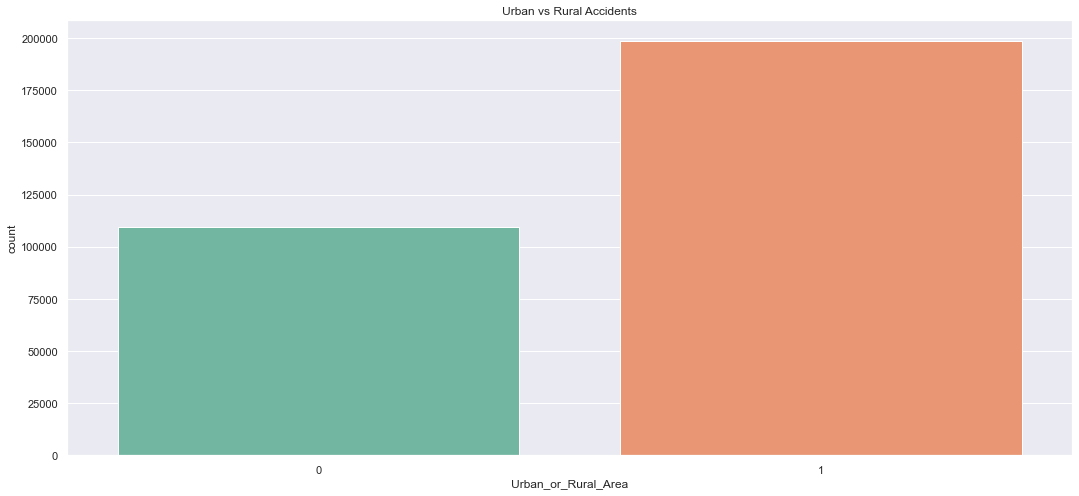

In [15]:
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (18, 8)

# Accident count by severity
sns.countplot(data=df, x='Accident_Severity', palette='Reds')
plt.title("Accident Count by Severity")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

# Accidents by hour
sns.histplot(df['Hour'], bins=24, kde=True, color='royalblue')
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.show()

# Road surface condition vs severity
sns.boxplot(data=df, x='Road_Surface_Conditions', y='Accident_Severity', palette='icefire')
plt.title("Road Surface Conditions vs. Severity")
plt.xlabel("Road Surface")
plt.ylabel("Severity")
plt.show()

# Accidents by Day of Week
sns.countplot(data=df, x='Day_of_Week', order=df['Day_of_Week'].value_counts().index, palette='cubehelix')
plt.title('Accidents by Day of the Week')
plt.xticks(rotation=45)
plt.show()

# Accident Severity Distribution
sns.countplot(data=df, x='Accident_Severity', palette='Set2')
plt.title('Accident Severity Distribution')
plt.show()

# Number of Casualties Distribution
sns.histplot(df['Number_of_Casualties'], kde=True, bins=20, color='darkorange')
plt.title('Distribution of Number of Casualties')
plt.show()

# Accidents by Speed Limit
sns.countplot(data=df, x='Speed_limit', palette='coolwarm')
plt.title('Accidents by Speed Limit')
plt.show()

# Weather Conditions During Accidents
sns.countplot(data=df, y='Weather_Conditions', order=df['Weather_Conditions'].value_counts().index, palette='rocket')
plt.title('Weather Conditions During Accidents')
plt.show()

# Light Conditions
sns.countplot(data=df, y='Light_Conditions', order=df['Light_Conditions'].value_counts().index, palette='Spectral')
plt.title('Light Conditions at Time of Accident')
plt.show()

# Urban vs Rural Area
sns.countplot(data=df, x='Urban_or_Rural_Area', palette='Set2')
plt.title('Urban vs Rural Accidents')
plt.show()

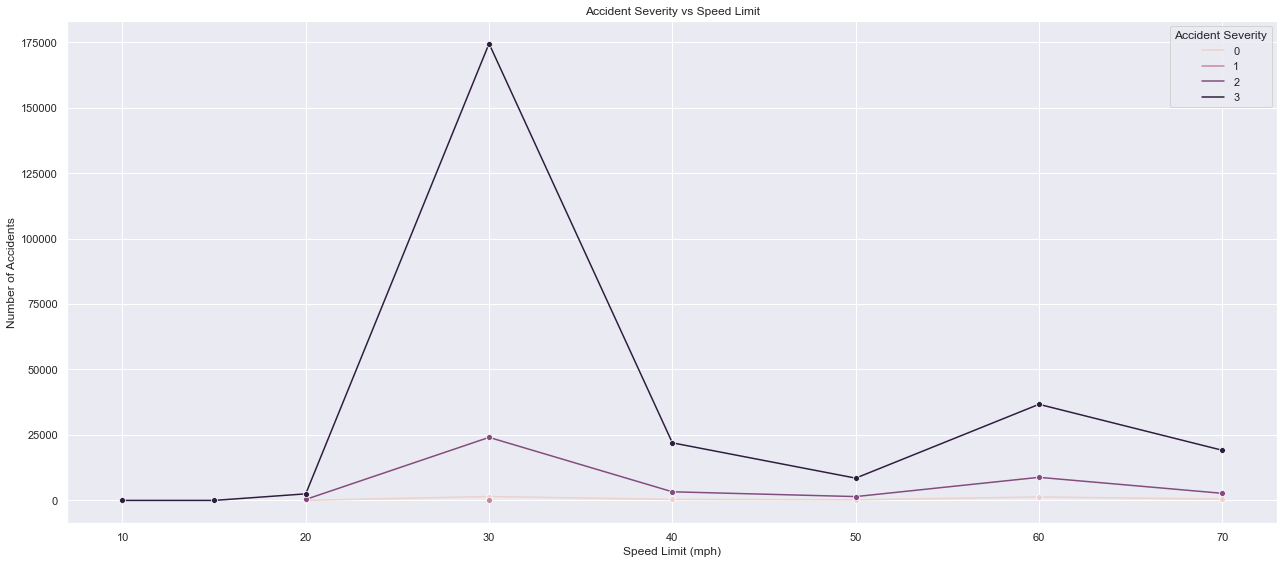

In [16]:
df.columns = df.columns.str.strip()  # Clean column names

# Check required columns exist
if 'Accident_Severity' in df.columns and 'Speed_limit' in df.columns:
    
    # Group and compute count of each severity per speed limit
    agg_df = df.groupby(['Speed_limit', 'Accident_Severity']).size().reset_index(name='Count')

    # Plot lineplot
    plt.figure(figsize=(18, 8))
    sns.lineplot(data=agg_df, x='Speed_limit', y='Count', hue='Accident_Severity', marker='o')
    plt.title('Accident Severity vs Speed Limit')
    plt.xlabel('Speed Limit (mph)')
    plt.ylabel('Number of Accidents')
    plt.legend(title='Accident Severity')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

else:
    print("❌ Columns 'Accident_Severity' or 'Speed_limit' not found in the dataset.")

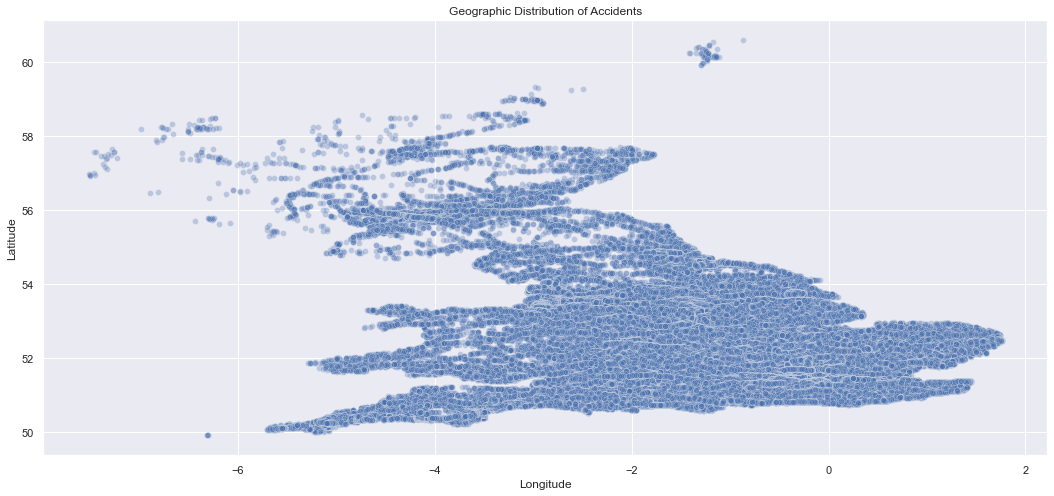

In [17]:
if 'Longitude' in df.columns and 'Latitude' in df.columns:
    plt.figure(figsize=(18, 8))
    sns.scatterplot(data=df, x='Longitude', y='Latitude', alpha=0.3)
    plt.title('Geographic Distribution of Accidents')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

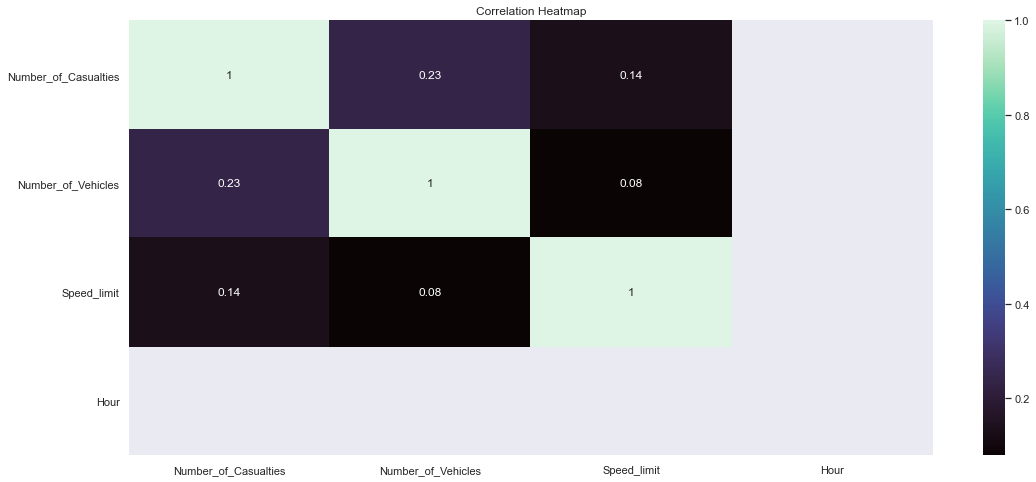

In [18]:
# Heatmap for Numeric Correlation
numeric_cols = ['Number_of_Casualties', 'Number_of_Vehicles', 'Speed_limit', 'Hour']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

STEP 5: Model Selection and Importing Required Models

In [ ]:
pip install lightgbm

In [ ]:
pip install --upgrade scikit-learn lightgbm

In [ ]:
pip install scikit-learn==1.0.2 lightgbm==3.3.2

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

STEP 6: Model Training and Evaluation

In [20]:
# Define features and target
target = 'Accident_Severity'
categorical_features = ['Day_of_Week', 'Junction_Control', 'Junction_Detail',
                       'Light_Conditions', 'Road_Surface_Conditions', 'Road_Type',
                       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']
numerical_features = ['Hour', 'Speed_limit', 'Number_of_Vehicles', 'Number_of_Casualties']

# Ensure we only use columns that exist in the dataframe
categorical_features = [col for col in categorical_features if col in df.columns]
numerical_features = [col for col in numerical_features if col in df.columns]

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data
X = df[categorical_features + numerical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Logistic Regression Model
LR_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ])

# Fitting the model and Evaluation the performance
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
    
LR_Accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel: Logistic Regression")
print("Accuracy:", LR_Accuracy)
print(classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.3686175825959899
              precision    recall  f1-score   support

           0       0.03      0.53      0.06       823
           1       0.00      0.50      0.00         8
           2       0.17      0.24      0.20      8101
           3       0.91      0.39      0.54     52663

    accuracy                           0.37     61595
   macro avg       0.28      0.41      0.20     61595
weighted avg       0.80      0.37      0.49     61595



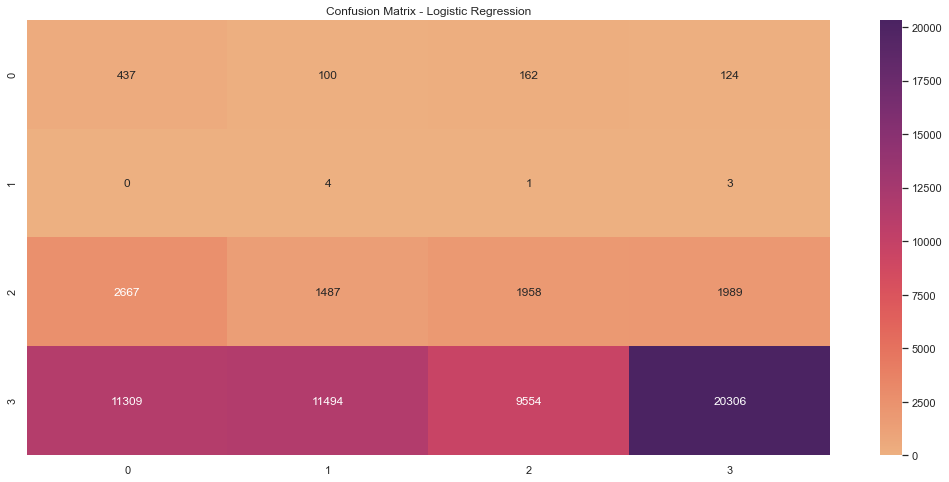

In [23]:
# Plotting for Logistic Regression Model
plt.figure(figsize=(18, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='flare')
plt.title(f"Confusion Matrix - Logistic Regression")
plt.show()

In [24]:
# Random Forest Classifier
RFC_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced'))])

# Fitting the model and Evaluating the Performance
RFC_model.fit(X_train, y_train)
y_pred = RFC_model.predict(X_test)

RFC_Accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel: Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model: Random Forest Classifier
Accuracy: 0.4966149849825473
              precision    recall  f1-score   support

           0       0.03      0.53      0.06       823
           1       0.00      0.12      0.00         8
           2       0.18      0.27      0.22      8101
           3       0.90      0.53      0.67     52663

    accuracy                           0.50     61595
   macro avg       0.28      0.37      0.24     61595
weighted avg       0.80      0.50      0.60     61595



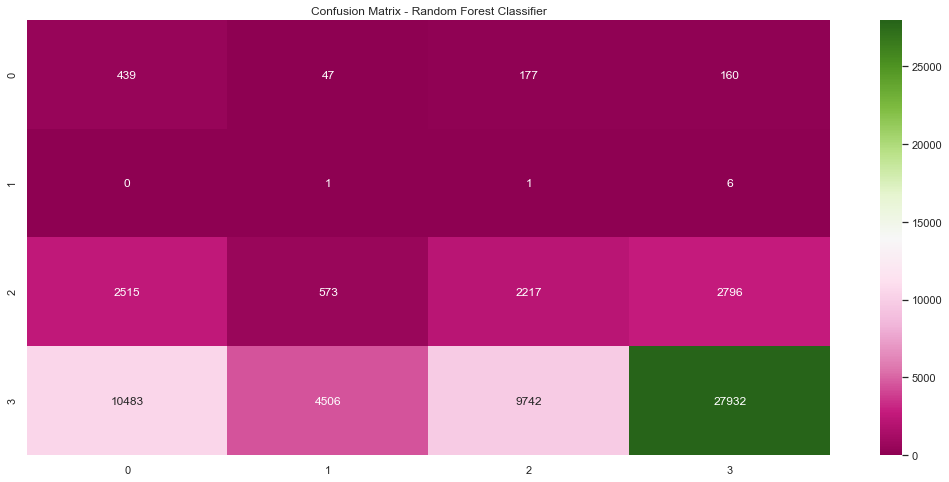

In [25]:
# Plotting for Random Forest Classifier
plt.figure(figsize=(18, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='PiYG')
plt.title(f"Confusion Matrix - Random Forest Classifier")
plt.show()

In [26]:
#LGBM Classifier
lgbm_model = LGBMClassifier(
    boosting_type='gbdt',
    num_leaves=31,
    max_depth=8,
    learning_rate=0.05,
    n_estimators=500,
    class_weight='balanced', 
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1
)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fitting the model
lgbm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lgbm_model)
])

lgbm_pipe.fit(X_train, y_train)

LGBM_Accuracy = accuracy_score(y_test, y_pred)
# Evaluation the performance
y_pred = lgbm_pipe.predict(X_test)
print("LightGBM Performance:")
print("Accuracy: ",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


LightGBM Performance:
Accuracy:  0.539589252374381
              precision    recall  f1-score   support

           0       0.04      0.51      0.07       823
           1       0.00      0.12      0.00         8
           2       0.18      0.32      0.23      8101
           3       0.91      0.57      0.70     52663

    accuracy                           0.54     61595
   macro avg       0.28      0.38      0.25     61595
weighted avg       0.80      0.54      0.63     61595



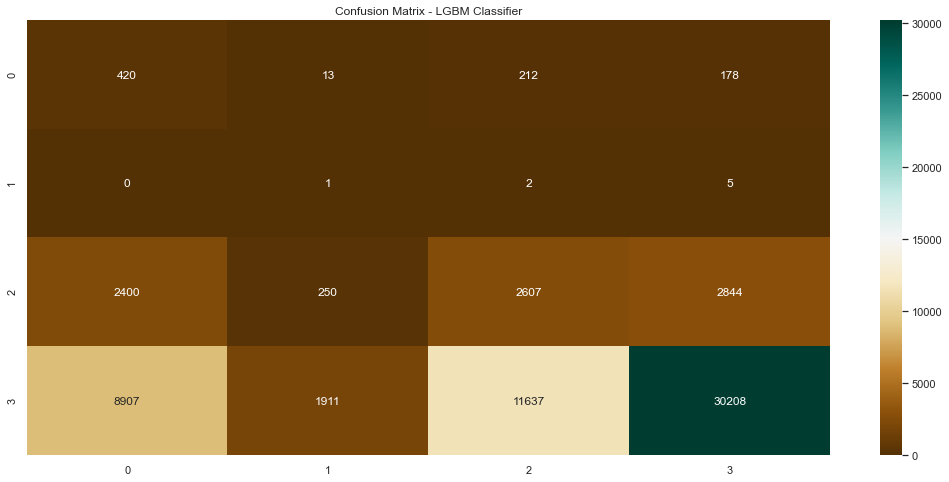

In [27]:
# Plotting for LGBM Classifier
plt.figure(figsize=(18, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='BrBG')
plt.title(f"Confusion Matrix - LGBM Classifier")
plt.show()

In [28]:
# XGB Classifier
XGB_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
    ])

# Fitting the model and Evaluating the Performance
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
    
XGB_Accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel: XGB Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Model: XGB Classifier
Accuracy: 0.8547122331358065
              precision    recall  f1-score   support

           0       0.33      0.00      0.00       823
           1       0.00      0.00      0.00         8
           2       0.38      0.01      0.01      8101
           3       0.86      1.00      0.92     52663

    accuracy                           0.85     61595
   macro avg       0.39      0.25      0.23     61595
weighted avg       0.79      0.85      0.79     61595



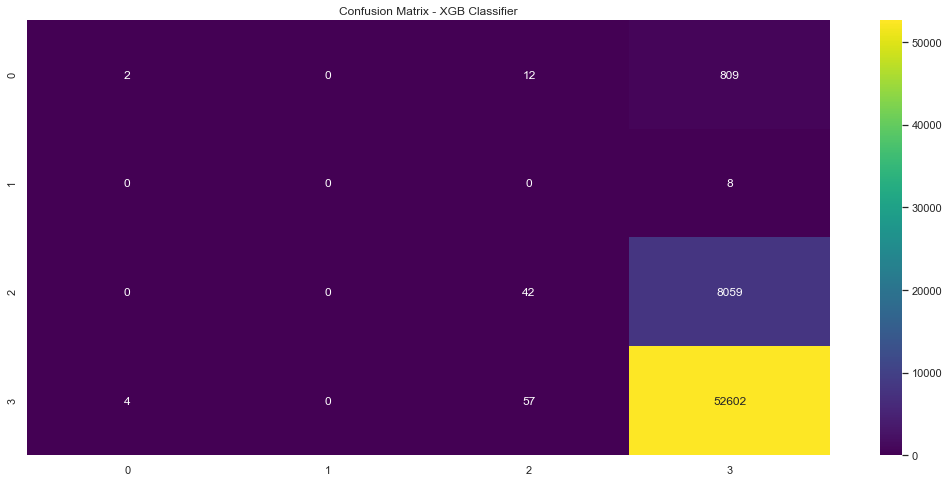

In [29]:
# Plotting for XGB Classifier
plt.figure(figsize=(18, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title(f"Confusion Matrix - XGB Classifier")
plt.show()

In [31]:
Accuracy_Scores = []
print("Accuracy for Logistic Regression Model: ", LR_Accuracy)
Accuracy_Scores.append(LR_Accuracy)
print("Accuracy for Random Forest Classifier Model: ",RFC_Accuracy)
Accuracy_Scores.append(RFC_Accuracy)
print("Accuracy for LGBM Classifier Model: ", LGBM_Accuracy)
Accuracy_Scores.append(LGBM_Accuracy)
print("Accuracy for XGB Classifier Model: ", XGB_Accuracy)
Accuracy_Scores.append(XGB_Accuracy)

Accuracy for Logistic Regression Model:  0.3686175825959899
Accuracy for Random Forest Classifier Model:  0.4966149849825473
Accuracy for LGBM Classifier Model:  0.4966149849825473
Accuracy for XGB Classifier Model:  0.8547122331358065


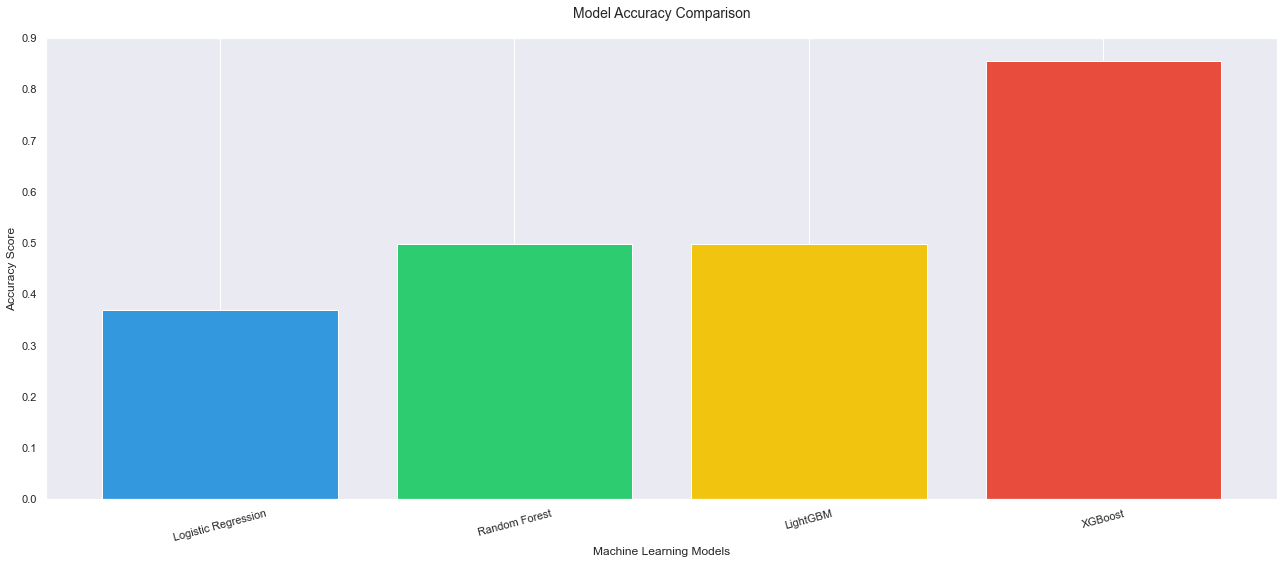

In [41]:
# Create bar plot
plt.figure(figsize=(18, 8))
models = ['Logistic Regression','Random Forest', 'LightGBM', 'XGBoost']
bars = plt.bar(models, Accuracy_Scores, color=['#3498de', '#2ecc71', '#f1c40f', '#e74c3c'])

# Customize plot
plt.title('Model Accuracy Comparison', fontsize=14, pad=20)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0.0, 0.9)  # Set y-axis range to highlight differences
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar


# Rotate model names for better readability
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

By Above Comparision, the Best Model that fits the data is XGBoost Classifier